# Exploitation Comparison of Different Zero-sum Game Methods
The figures show the learning curve of the exploiter after the model is trained with different type of methods. The exploiter is set as the second player for all envs and methods.

In [15]:
import json

def load_data(file_name):
    file_dir = folder+files[0]
    file_dir = folder+file_name
    # print(file_dir)
    
    data = json.load( open(file_dir+"/eval.json"))
    # print(data.keys())
    return data

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['savefig.facecolor']='white'
# plt.style.use('seaborn-whitegrid')
plt.style.use('default')
import matplotlib.cm as cm


def plot(x, data, method, color, agent_to_plot, smooth_radius=200, range=100000):
    def smooth(y, radius=200, mode='two_sided'):
        if len(y) < 2*radius+1:
            return np.ones_like(y) * y.mean()
        elif mode == 'two_sided':
            convkernel = np.ones(2 * radius+1)
            return np.convolve(y, convkernel, mode='same') / \
                   np.convolve(np.ones_like(y), convkernel, mode='same')
        elif mode == 'causal':
            convkernel = np.ones(radius)
            out = np.convolve(y, convkernel,mode='full') / \
                  np.convolve(np.ones_like(y), convkernel, mode='full')
            return out[:-radius+1]

    k = method
    v = data[agent_to_plot]
    try:
        plt.plot(x, v[:range], color=color, alpha=0.2)
        plt.plot(x, smooth(v[:range], radius=smooth_radius), color=color, label=k)
    except:
        pass


['pettingzoo_boxing_v1_fictitious_selfplay2', 'pettingzoo_boxing_v1_nash_ppo', 'pettingzoo_boxing_v1_nfsp', 'pettingzoo_boxing_v1_nxdo2', 'pettingzoo_boxing_v1_selfplay2', 'pettingzoo_ice_hockey_v1_fictitious_selfplay2', 'pettingzoo_ice_hockey_v1_nash_ppo', 'pettingzoo_ice_hockey_v1_nfsp', 'pettingzoo_ice_hockey_v1_selfplay2', 'pettingzoo_pong_v2_fictitious_selfplay2', 'pettingzoo_pong_v2_nash_ppo', 'pettingzoo_pong_v2_nfsp', 'pettingzoo_pong_v2_nxdo2', 'pettingzoo_pong_v2_selfplay2', 'pettingzoo_tennis_v2_fictitious_selfplay2', 'pettingzoo_tennis_v2_nash_ppo', 'pettingzoo_tennis_v2_nfsp', 'pettingzoo_tennis_v2_nxdo2', 'pettingzoo_tennis_v2_selfplay2', 'slimevolley_SlimeVolley-v0_fictitious_selfplay2', 'slimevolley_SlimeVolley-v0_nash_ppo', 'slimevolley_SlimeVolley-v0_nfsp', 'slimevolley_SlimeVolley-v0_nxdo2', 'slimevolley_SlimeVolley-v0_selfplay2']
['pettingzoo_tennis_v2_fictitious_selfplay2', 'pettingzoo_tennis_v2_nash_ppo', 'pettingzoo_tennis_v2_nfsp', 'pettingzoo_tennis_v2_nxdo2', 

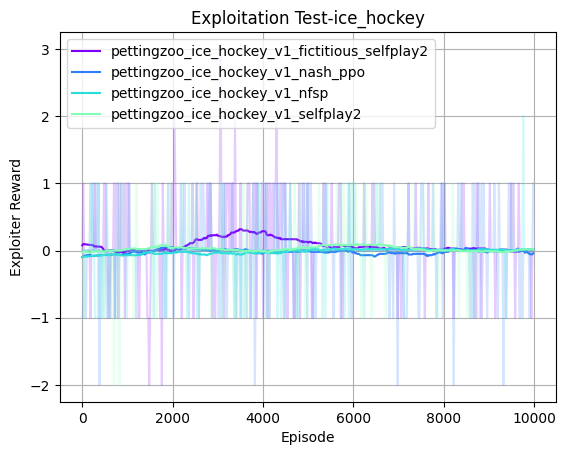

In [28]:
import os

envs = ['tennis', 'slimevolley', 'boxing', 'pong', 'ice_hockey']
index = '20220421_1855'
exploited_models = ['first', 'second']
for exploited_model in exploited_models:
    os.makedirs(f'{index}_exploit/{exploited_model}', exist_ok=True)
    folder = f'../data/log/{index}_exploit_{exploited_model}/'
    files = ! ls $folder
    print(files)
    colors = cm.rainbow(np.linspace(0, 1, 7))
    # colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
    if exploited_model == 'first':
        agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
    else:
        agent_to_plot = 'first_0'

    for env in envs:
        env_files =[f for f in files if env in f]
        print(env_files)

        plt.clf()
        for f, c in zip(env_files, colors):
            data = load_data(f)

            method = f.split(r'v(\d+)_')[-1]
            plot(data['episode'], data['episode_reward'], method, c, agent_to_plot, smooth_radius=50)

        plt.legend()
        plt.grid()
        plt.title(f'Exploitation Test-{env}')
        plt.xlabel('Episode')
        plt.ylabel('Exploiter Reward')
        savepath=f'{index}_exploit/{exploited_model}/compare_exploitation_{env}.png'
        plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter', 'pettingzoo_pong_v2_nash_dqn', 'pettingzoo_pong_v2_nash_dqn_exploiter', 'pettingzoo_tennis_v2_nash_dqn', 'pettingzoo_tennis_v2_nash_dqn_exploiter', 'slimevolley_SlimeVolley-v0_nash_dqn', 'slimevolley_SlimeVolley-v0_nash_dqn_exploiter']
['pettingzoo_tennis_v2_nash_dqn', 'pettingzoo_tennis_v2_nash_dqn_exploiter']
['slimevolley_SlimeVolley-v0_nash_dqn', 'slimevolley_SlimeVolley-v0_nash_dqn_exploiter']
['pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter']
['pettingzoo_pong_v2_nash_dqn', 'pettingzoo_pong_v2_nash_dqn_exploiter']
['pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter']
['pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter', 'pettingzoo_pong_v2_nash_dqn', 'pettingzo

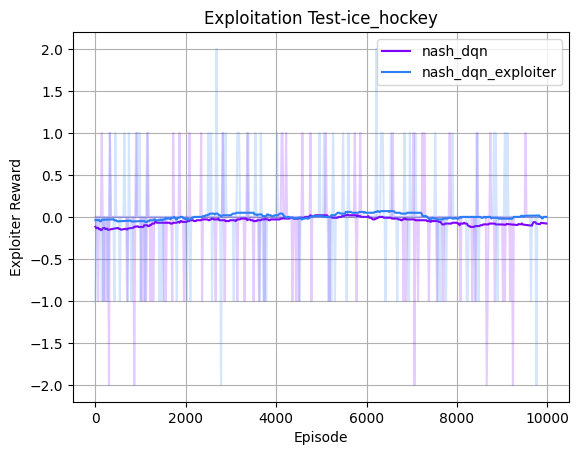

In [25]:
import os

envs = ['tennis', 'slimevolley', 'boxing', 'pong', 'ice_hockey']
index = '20220421_1859'
exploited_models = ['first', 'second']
for exploited_model in exploited_models:
    os.makedirs(f'{index}_exploit/{exploited_model}', exist_ok=True)
    folder = f'../data/log/{index}_exploit_{exploited_model}/'
    files = ! ls $folder
    print(files)
    colors = cm.rainbow(np.linspace(0, 1, 7))
    # colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
    if exploited_model == 'first':
        agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
    else:
        agent_to_plot = 'first_0'

    for env in envs:
        env_files =[f for f in files if env in f]
        print(env_files)

        plt.clf()
        for f, c in zip(env_files, colors):
            data = load_data(f)
            method = f.split('v1_')[-1]
            plot(data['episode'], data['episode_reward'], method, c, agent_to_plot, smooth_radius=50)

        plt.legend()
        plt.grid()
        plt.title(f'Exploitation Test-{env}')
        plt.xlabel('Episode')
        plt.ylabel('Exploiter Reward')
        savepath=f'{index}_exploit/{exploited_model}/compare_exploitation_{env}.png'
        plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter', 'pettingzoo_pong_v2_nash_dqn', 'pettingzoo_pong_v2_nash_dqn_exploiter', 'pettingzoo_tennis_v2_nash_dqn', 'pettingzoo_tennis_v2_nash_dqn_exploiter', 'slimevolley_SlimeVolley-v0_nash_dqn', 'slimevolley_SlimeVolley-v0_nash_dqn_exploiter']
['pettingzoo_tennis_v2_nash_dqn', 'pettingzoo_tennis_v2_nash_dqn_exploiter']
['slimevolley_SlimeVolley-v0_nash_dqn', 'slimevolley_SlimeVolley-v0_nash_dqn_exploiter']
['pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter']
['pettingzoo_pong_v2_nash_dqn', 'pettingzoo_pong_v2_nash_dqn_exploiter']
['pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter']
['pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter', 'pettingzoo_pong_v2_nash_dqn', 'pettingzo

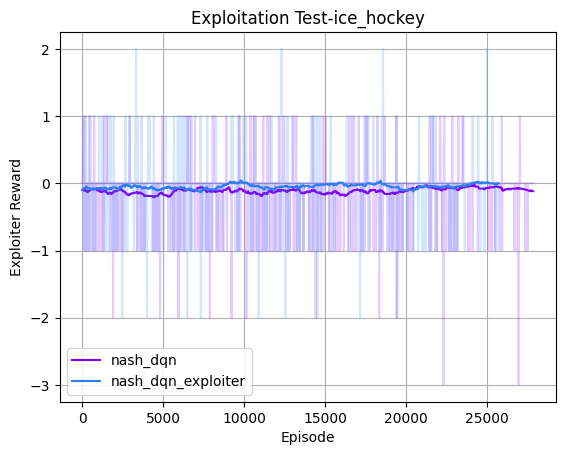

In [29]:
import os

envs = ['tennis', 'slimevolley', 'boxing', 'pong', 'ice_hockey']
index = '20220421_1859'
exploited_models = ['first', 'second']
for exploited_model in exploited_models:
    os.makedirs(f'{index}_exploit_50000/{exploited_model}', exist_ok=True)
    folder = f'../data/log/{index}_exploit_{exploited_model}_50000/'
    files = ! ls $folder
    print(files)
    colors = cm.rainbow(np.linspace(0, 1, 7))
    # colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
    if exploited_model == 'first':
        agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
    else:
        agent_to_plot = 'first_0'

    for env in envs:
        env_files =[f for f in files if env in f]
        print(env_files)

        plt.clf()
        for f, c in zip(env_files, colors):
            data = load_data(f)
            method = f.split('v1_')[-1]
            plot(data['episode'], data['episode_reward'], method, c, agent_to_plot, smooth_radius=50)

        plt.legend()
        plt.grid()
        plt.title(f'Exploitation Test-{env}')
        plt.xlabel('Episode')
        plt.ylabel('Exploiter Reward')
        savepath=f'{index}_exploit_50000/{exploited_model}/compare_exploitation_{env}.png'
        plt.savefig(savepath, bbox_inches='tight',)